In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVR

In [2]:
df = pd.read_csv('Curvas_de_Ventas_TipoProducto.csv')
campos = df['TipoProducto'].unique()
print(campos)
df.head()

['ARTICULOS DEPORTIVOS' 'BELLEZA INTEGRAL' 'BOLSAS' 'CALZADO' 'CINTOS'
 'ELECTRÓNICA' 'HOME' 'VESTIR EXTERIOR' 'VESTIR INTERIOR']


,TipoProducto,Semana,Pronostico,Ventas
0,ARTICULOS DEPORTIVOS,1,8228,8406
1,ARTICULOS DEPORTIVOS,2,8488,9287
2,ARTICULOS DEPORTIVOS,3,8598,9181
3,ARTICULOS DEPORTIVOS,4,13662,9253
4,ARTICULOS DEPORTIVOS,5,13896,10061


In [3]:
def tendencia_SVM(df, campo, C, epsilon):

        # Filtrando los datos por el campo y obteniendo X & y
        data = df[df['TipoProducto'] == campo]
        X = data['Semana'].values.reshape(-1, 1)
        y = data['Ventas'].values

        # Creando y ajustando el modelo SVR con alto valor de C y pequeño epsilon para un alto sobreajuste
        svr_rbf = SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr_rbf.fit(X, y)

        # Realizando predicciones en el rango extendido
        extended_weeks = np.linspace(1,52,200)
        svr_predictions = svr_rbf.predict(extended_weeks.reshape(-1, 1))
        
        # Gráfico de los datos y las predicciones ajustadas
        plt.figure(figsize=(14, 7))
        plt.scatter(X, y, color='blue', label='Datos Reales', alpha=0.3)
        plt.plot(extended_weeks, svr_predictions, color='darkorange', label='Ajuste SVR con alto C y bajo epsilon', linewidth=4)
        plt.xlabel('Semana')
        plt.title(campo)
        
        # Colores de los ejes
        plt.grid(color='gray', linestyle='-', linewidth=0.1)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['bottom'].set_visible(False)
        plt.gca().spines['left'].set_visible(False)
        
        # Mostrar gráfica
        plt.show()

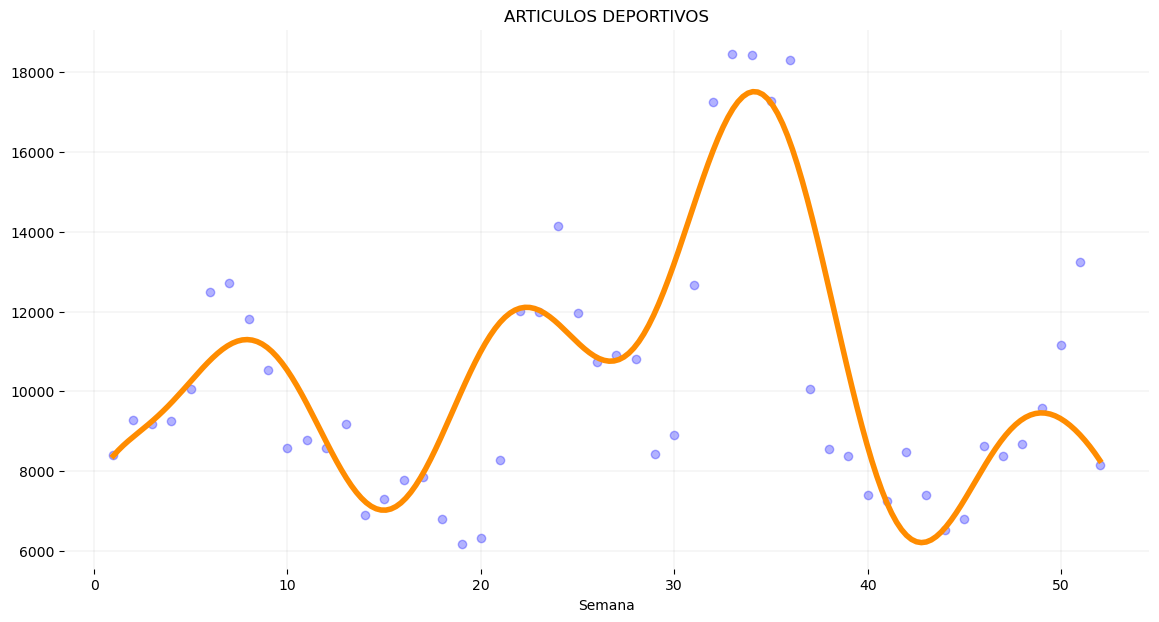

In [4]:
tendencia_SVM(df, campos[0], 1e9, 0.001)

In [5]:
#tendencia_SVM(df, campos[1], 1e9, 0.001)

In [6]:
#tendencia_SVM(df, campos[2], 1e7, 0.001)

In [7]:
#tendencia_SVM(df, campos[3], 1e7, 0.001)

In [8]:
#tendencia_SVM(df, campos[4], 1e7, 0.001)

In [9]:
#tendencia_SVM(df, campos[5], 1e7, 0.001)

In [10]:
#tendencia_SVM(df, campos[6], 1e7, 0.001)

In [11]:
#tendencia_SVM(df, campos[7], 1e7, 0.001)

In [12]:
#tendencia_SVM(df, campos[8], 1e7, 0.001)